In [ ]:
pip install kagglehub 

Note: you may need to restart the kernel to use updated packages.


In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sgpjesus_bank_account_fraud_dataset_neurips_2022_path = kagglehub.dataset_download('sgpjesus/bank-account-fraud-dataset-neurips-2022')

print('Data source import complete.')


/opt/anaconda3/envs/llm-arm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 532M/532M [02:24<00:00, 3.86MB/s] 

Extracting files...


Data source import complete.


In [6]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm catboost imbalanced-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 3.9 MB/s eta 0:00:0000:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 3.9 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.7 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   

In [7]:
pip install joblib 

Note: you may need to restart the kernel to use updated packages.


# Bank Account Fraud (NeurIPS 2022)

1. Exploratory Data Analysis of Bank Account Applications
    1. Number of Transactions by Fraud Status
    2. Missing Values of Features by Fraud Status
    3. Distribution and Outliers of Features by Fraud Status
    <br/><br/>
2. Feature Engineering for Fraud Detection of Bank Account Applications
    1. One-Hot Encoding for Categorical Features
    2. Min-Max Scaling for Numerical Features
    <br/><br/>
3. Feature Selection for Fraud Detection of Bank Account Applications
    1. Variance Threshold Test for Constant Features
    2. Pearson Correlation Test for Multicollinearity
    3. Chi-Squared Test for Categorical Features
    4. Mutual Information Test for Numeric Features
    5. Extra Trees Classifier for Feature Selection
    <br/><br/>
4. Fraud Detection Model Training Functions using SMOTE and Grid Search CV
    <br/><br/>
5. Fraud Detection Model Testing Functions using Recall and ROC-AUC
    1. Classification Report for Model Testing
    2. Confusion Matrix for Model Testing
    3. Cross-Validation Results for Model Testing
    4. ROC-AUC for Model Testing
    <br/><br/>
6. Tree-Based Machine Learning Algorithms for Fraud Detection of Bank Account Applications
    1. Tree-Based Algorithm 1: DecisionTree
    2. Tree-Based Algorithm 2: RandomForest
    3. Tree-Based Algorithm 3: XGBoost
    4. Tree-Based Algorithm 4: LightGBM
    5. Plotting ROC Curves and Comparing AUC Scores
    6. Plotting Recall Scores for Fraud Class at Default and Target Thresholds
    <br/><br/>
7. Exporting Trained Machine Learning Model for Real-World Deployment
    1. Training the Final XGBoost Model with Optimal Hyperparameters
    2. Storing Test Data in SQLite3 Database
    <br/><br/>
    

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib to display plots inline in the notebook
%matplotlib inline

In [ ]:
# Increase the maximum number of columns displayed in Pandas to 200
pd.set_option('display.max_columns', 200)

# Set the default style of Matplotlib plots to "ggplot"
plt.style.use('ggplot')

In [ ]:
import os

# Read the CSV file into a Pandas DataFrame
csv_file_path = os.path.join(sgpjesus_bank_account_fraud_dataset_neurips_2022_path, 'Base.csv')
df = pd.read_csv(csv_file_path)

In [ ]:
# Create a deep copy of the DataFrame
new_df = df.copy()

In [ ]:
# Get the number of rows and columns in the DataFrame
df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 1000000
Number of columns: 32


In [ ]:
# Display the first 5 rows of the DataFrame
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


# 1. Exploratory Data Analysis of Bank Account Applications

In [ ]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
# Get the number of unique values in each column of the DataFrame
df.nunique()

,0
fraud_bool,2
income,9
name_email_similarity,998861
prev_address_months_count,374
current_address_months_count,423
customer_age,9
days_since_request,989330
intended_balcon_amount,994971
payment_type,5
zip_count_4w,6306


In [ ]:
# Get a summary of statistical information for each numerical column in the DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [ ]:
# Get a summary of statistical information for each non-numerical column in the DataFrame
df.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


### 1.1 Number of Transactions by Fraud Status

In [ ]:
# Create a new DataFrame showing the count of unique values in the 'fraud_bool' column
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts())
print(fraud_vals)

             count
fraud_bool        
0           988971
1            11029


In [ ]:
fraud_vals = fraud_vals.reset_index()
fraud_vals.rename(columns={'index': 'fraud_bool'}, inplace=True)
print(fraud_vals)

   fraud_bool   count
0           0  988971
1           1   11029


In [ ]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

/tmp/ipython-input-2246547458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)


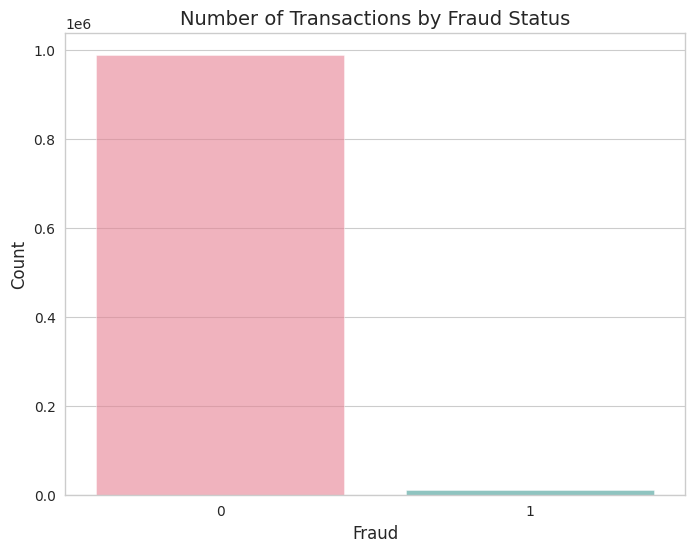

In [ ]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Display plot
plt.show()

The graph of the binary target feature reveals a highly imbalanced distribution, characterised by an extremely low prevalence of the positive class.

### 1.2 Missing Values of Features by Fraud Status

In [ ]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               71.06                          0.43   
1                               91.89                          0.13   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
0                            74.09              25.23   
1                            88.38              37.54   

            session_length_in_minutes  device_distinct_emails_8w  
fraud_bool                                                        
0                                0.20                       0.04  
1                                0.16                       0.04  


In [ ]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                         feature  fraud_bool  missing_vals
0      prev_address_months_count           0         71.06
1      prev_address_months_count           1         91.89
2   current_address_months_count           0          0.43
3   current_address_months_count           1          0.13
4         intended_balcon_amount           0         74.09
5         intended_balcon_amount           1         88.38
6              bank_months_count           0         25.23
7              bank_months_count           1         37.54
8      session_length_in_minutes           0          0.20
9      session_length_in_minutes           1          0.16
10     device_distinct_emails_8w           0          0.04
11     device_distinct_emails_8w           1          0.04


/tmp/ipython-input-2015125928.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Fraud", fontsize=10)


<Figure size 800x600 with 0 Axes>

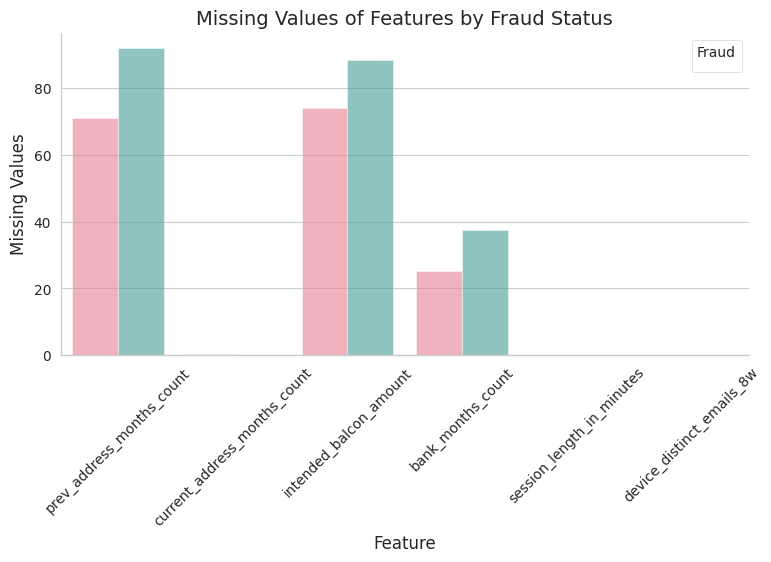

In [ ]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.catplot(data=missing_vals, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", palette=my_palette, alpha=.6, height=4, aspect=2, legend=False)

# Customize labels and legend
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Missing Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Missing Values of Features by Fraud Status", fontsize=14)
plt.legend(title="Fraud", fontsize=10)

# Display plot
plt.show()

When examining features like `prev_address_months_count`, `intended_balcon_amount`, and `bank_months_count`, it becomes apparent that a considerable number of missing values exist in their original distribution. However, despite these missing values, these features still hold informative value and exhibit correlation with the target feature.

It's important to highlight that the missing values in these features are actually represented by negative values and were not transformed into explicit missing values during preprocessing. The potential impact of such a transformation has not been evaluated, as it could potentially result in information loss, even though negative values themselves do not possess any specific meaning.

### 1.3 Distribution and Outliers of Features by Fraud Status

In [ ]:
# Create a list of numeric features in the DataFrame df
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


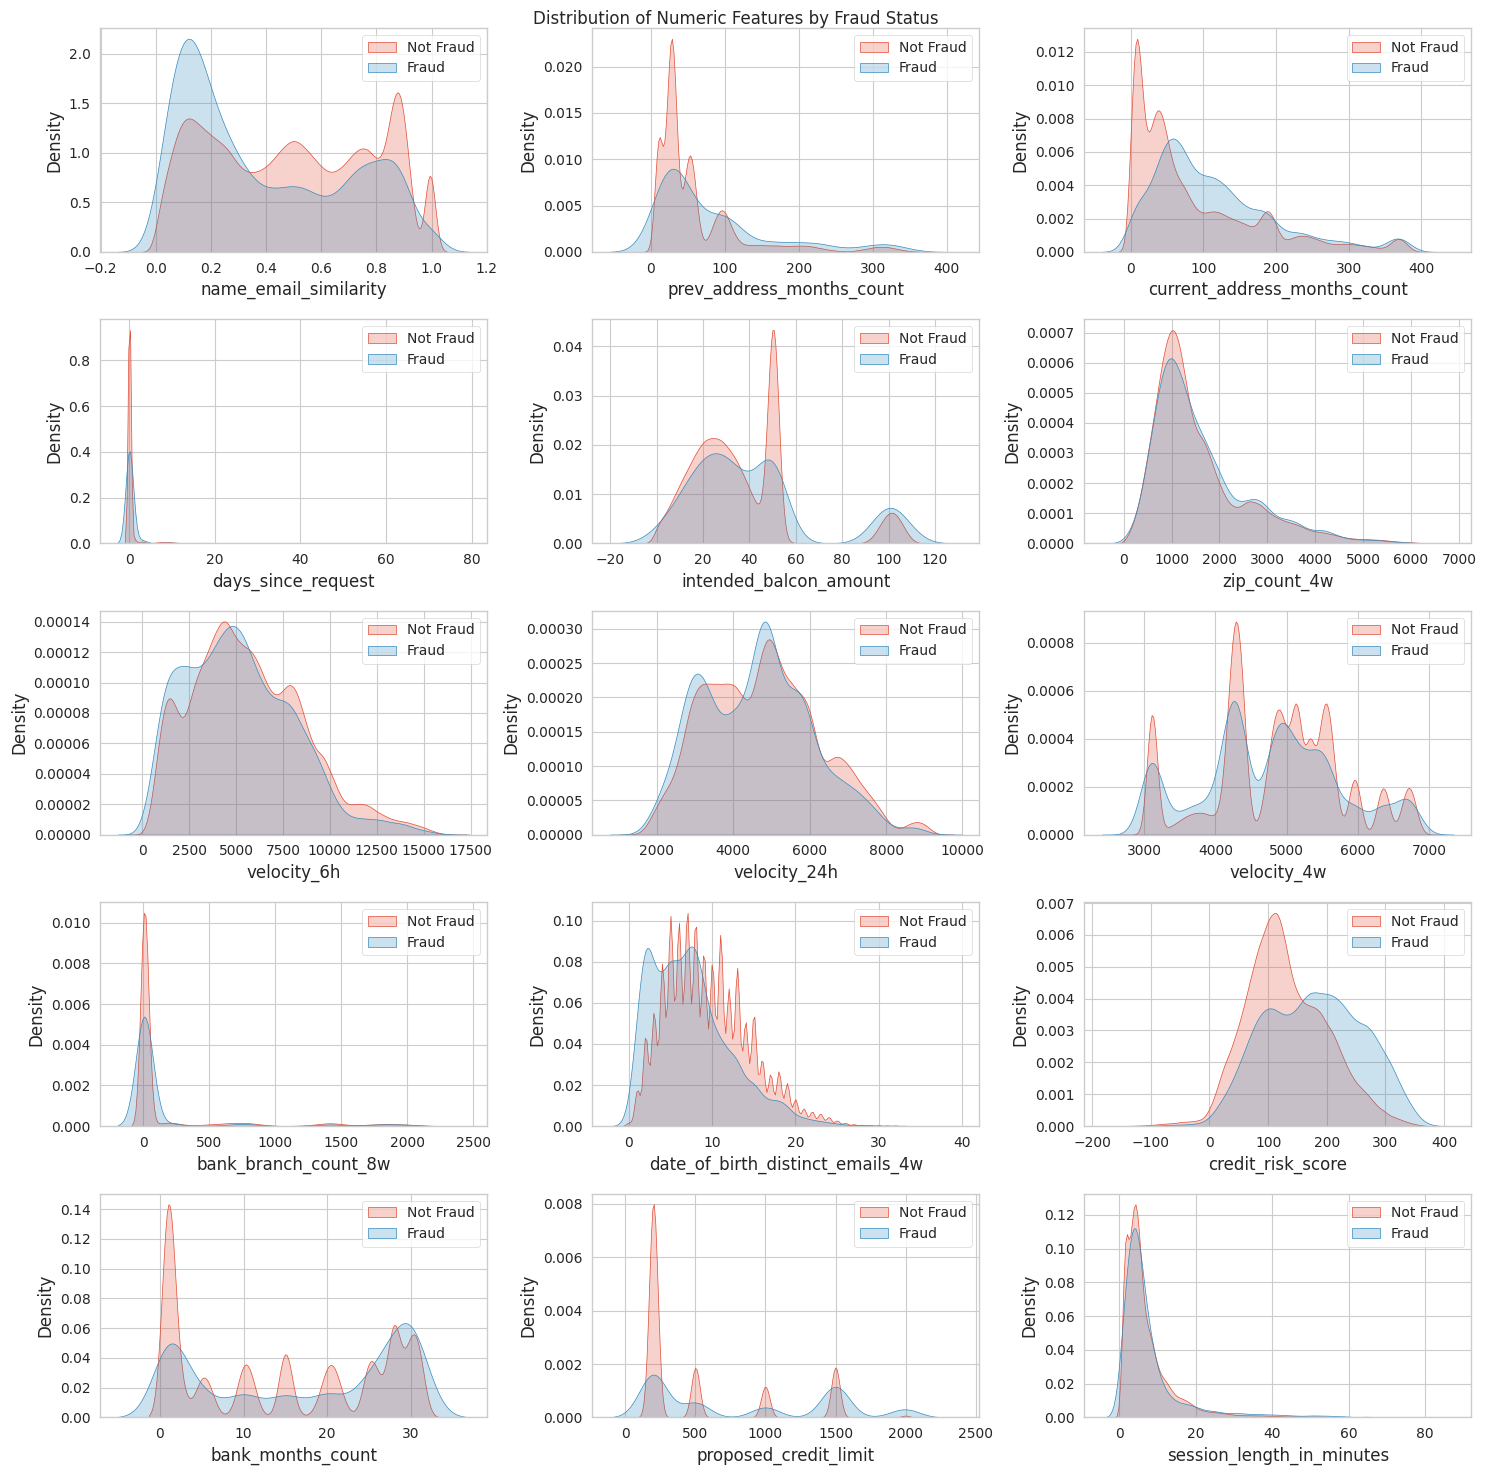

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-3863268507.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
/tmp/ipython-input-3863268507.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Fraud', 'Fraud'])
/tmp/ipython-input-3863268507.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
/tmp/ipython-input-3863268507.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usi

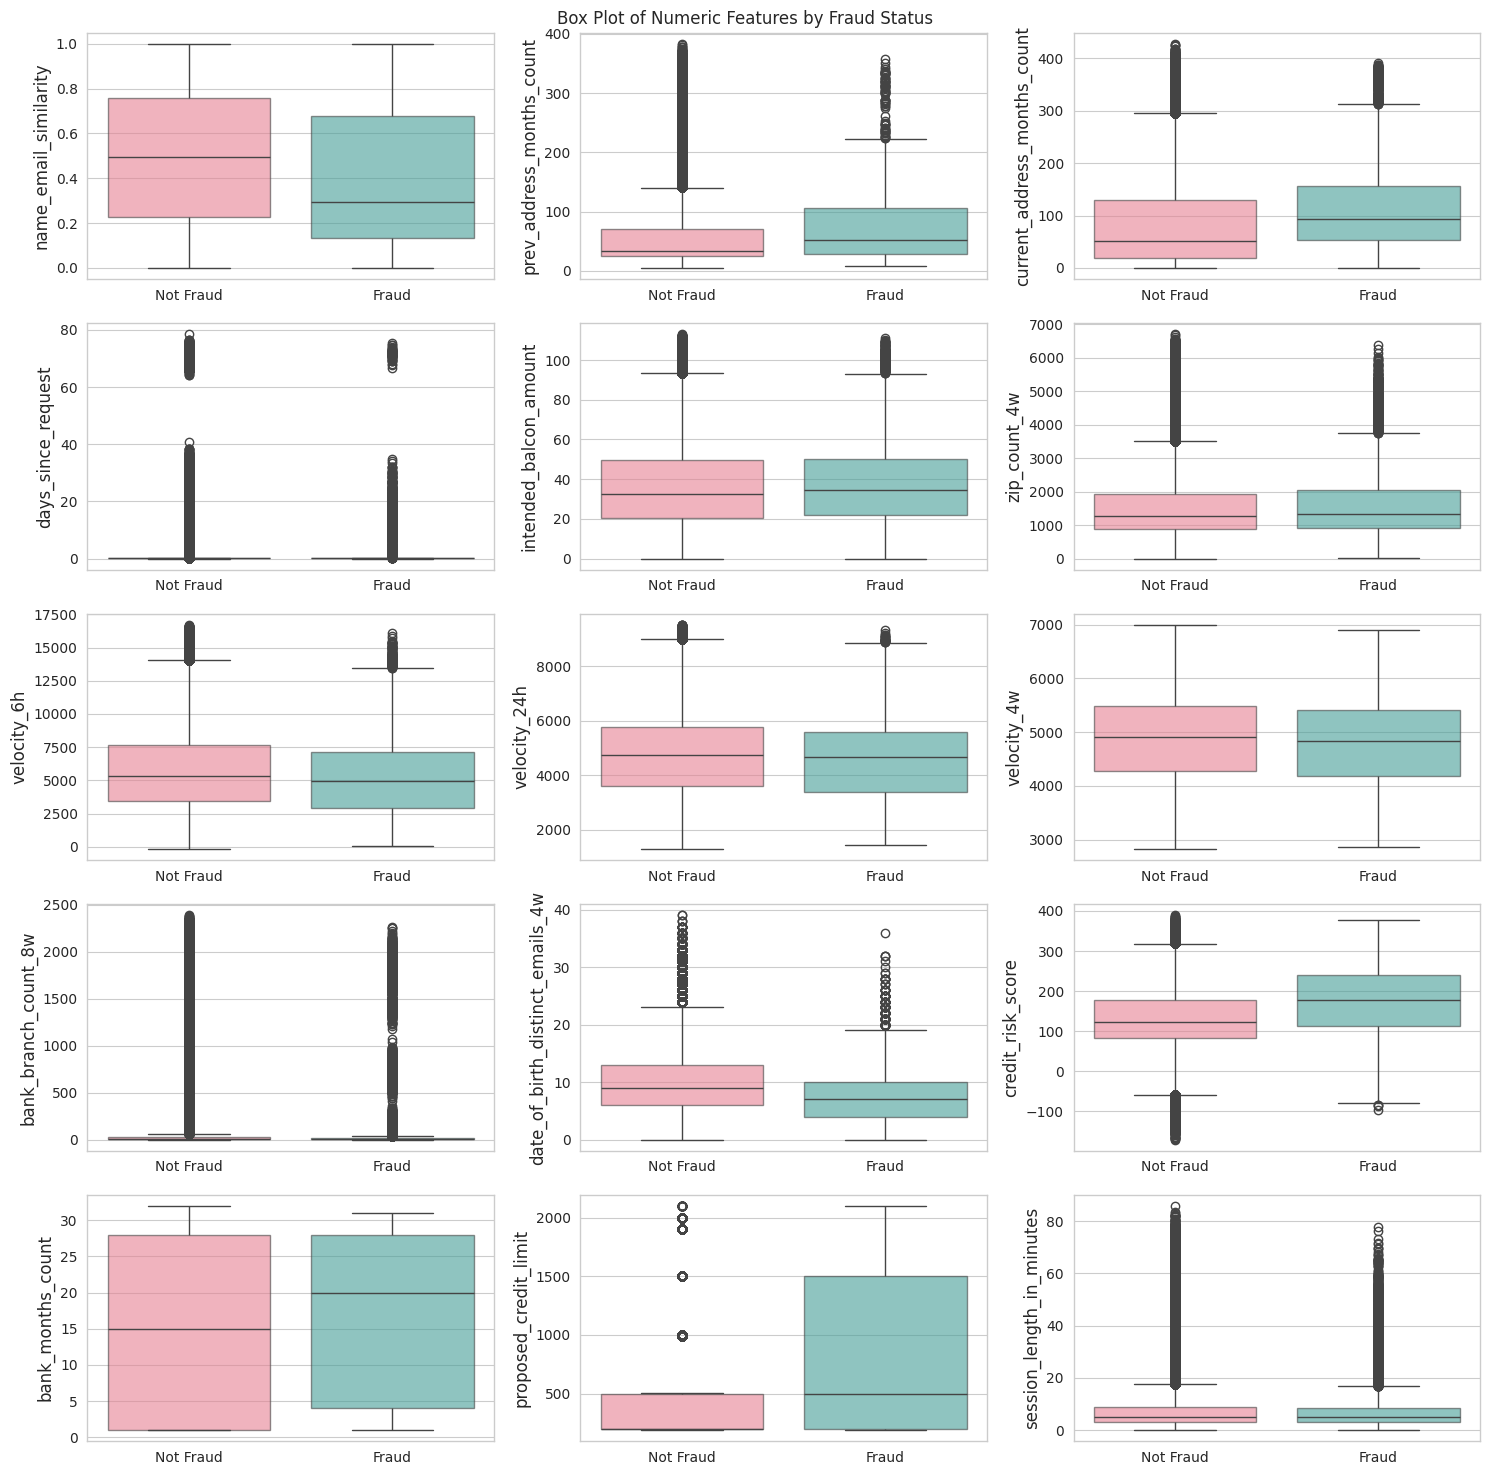

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Removing outliers in the context of imbalanced data can pose challenges. Outliers may contain valuable information or represent rare instances of the minority class. Their removal can lead to information loss, distort the class distribution, introduce bias towards the majority class, and deviate from real-world scenarios.

Considering the potential impact on model performance, it is important to exercise caution and explore alternative approaches that preserve the integrity of the imbalanced data while addressing outliers, such as robust modeling techniques or outlier detection methods specifically designed for imbalanced datasets.

# 2. Feature Engineering for Fraud Detection of Bank Account Applications

### 2.1 One-Hot Encoding for Categorical Features

In [ ]:
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [ ]:
# Convert categorical variables into dummy variables using one-hot encoding
new_df = pd.DataFrame(pd.get_dummies(new_df, prefix=categorical_features))
new_df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
       'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC',
       'payment_type_AD', 'payment_type_AE', 'employment_status_CA',
       'employment_status_CB', 'employment_status_CC', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'employment_status_CG',
       'housing_status_BA', 'housing_status_BB', 'housing_status_BC',
     

In [ ]:
# Display the first 5 rows of the DataFrame
new_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,1,0,1,9,0,1500.0,0,16.224843,1,1,0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,1,1,1,2,0,1500.0,0,3.363854,1,1,0,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,1,0,1,30,0,200.0,0,22.730559,0,1,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,0,1,1,0,200.0,0,15.215816,1,1,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,0,1,1,26,0,200.0,0,3.743048,0,1,0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [ ]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

One-hot encoding categorical features is a valuable technique that transforms them into a format suitable for machine learning. It represents each category as a binary variable, capturing their distinctness and independence. By utilising one-hot encoding, the algorithm can effectively incorporate categorical information during model training. This enables better prediction and accurate decision-making based on the categorical feature values.

### 2.2 Min-Max Scaling for Numerical Features

In [ ]:
# Import the necessary libraries for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from joblib import load, dump

In [ ]:
# Scale the numeric features in the training and testing sets using MinMaxScaler
numeric_transformer = MinMaxScaler()

# Define the ColumnTransformer object with the numeric transformer and the list of numeric features
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features)], remainder='passthrough')

# Fit the preprocessor on the training set and transform both the training and testing sets
X_scaled = preprocessor.fit_transform(X)
# X_test_scaled = preprocessor.transform(X_test)

In [ ]:
# Get the names of the features after pre-processing
feature_names = preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
feature_names = [feature.replace('remainder__', '') for feature in feature_names]

# Print the pre-processed feature names
print(feature_names)

['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_B

In [ ]:
len(feature_names)

52

In [ ]:
# Convert the scaled training and testing sets to pandas DataFrames
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

In [ ]:
X_scaled.shape

(1000000, 52)

MinMax scaling is employed to normalise numerical features within a specific range, usually 0 to 1. This technique standardises the features, ensuring equitable evaluation during training. By applying MinMax scaling, the numerical features become comparable, resulting in more dependable and precise outcomes from the machine learning algorithm.

### 2.3 Saving the Preprocessor

In [ ]:
# Read the CSV file into a Pandas DataFrame
csv_file_path = os.path.join(sgpjesus_bank_account_fraud_dataset_neurips_2022_path, 'Base.csv')
df = pd.read_csv(csv_file_path)

In [ ]:
# Create a deep copy of the DataFrame
new_df = df.copy()

In [ ]:
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [ ]:
# Create a list of numeric features in the DataFrame df
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop=None, sparse_output=False)
numeric_transformer = MinMaxScaler()

In [ ]:
# Combine into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        (" ", categorical_transformer, categorical_features),
        ("scaled", numeric_transformer, numeric_features)
    ],
    remainder = 'passthrough'
)


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Wrap in a pipeline for easy deployment
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

In [ ]:
# Separate features and target
X = new_df.drop("fraud_bool", axis=1)
y = new_df["fraud_bool"]

# Fit pipeline on training data
X_processed = pipeline.fit_transform(X)

# Save the preprocessor
os.makedirs("./preprocessor", exist_ok=True)
dump(pipeline, "./preprocessor/preprocessor.joblib")

['./preprocessor/preprocessor.joblib']

In [ ]:
X_processed.shape

(1000000, 52)

In [ ]:
# Get feature names from the preprocessor
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()

In [ ]:
print(feature_names)

[' __payment_type_AA' ' __payment_type_AB' ' __payment_type_AC'
 ' __payment_type_AD' ' __payment_type_AE' ' __employment_status_CA'
 ' __employment_status_CB' ' __employment_status_CC'
 ' __employment_status_CD' ' __employment_status_CE'
 ' __employment_status_CF' ' __employment_status_CG'
 ' __housing_status_BA' ' __housing_status_BB' ' __housing_status_BC'
 ' __housing_status_BD' ' __housing_status_BE' ' __housing_status_BF'
 ' __housing_status_BG' ' __source_INTERNET' ' __source_TELEAPP'
 ' __device_os_linux' ' __device_os_macintosh' ' __device_os_other'
 ' __device_os_windows' ' __device_os_x11' 'scaled__name_email_similarity'
 'scaled__prev_address_months_count'
 'scaled__current_address_months_count' 'scaled__days_since_request'
 'scaled__intended_balcon_amount' 'scaled__zip_count_4w'
 'scaled__velocity_6h' 'scaled__velocity_24h' 'scaled__velocity_4w'
 'scaled__bank_branch_count_8w' 'scaled__date_of_birth_distinct_emails_4w'
 'scaled__credit_risk_score' 'scaled__bank_months_coun

In [ ]:
# Remove 'remainder__' from the feature names
feature_names = [feature.replace('remainder__', '') for feature in feature_names]
# Remove '__' from the feature names
feature_names = [feature.replace(' __', '') for feature in feature_names]

In [ ]:
print(feature_names)

['payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11', 'scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_l

# 3. Feature Selection for Fraud Detection of Bank Account Applications

In [ ]:
# Import the necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier

### Resampling for Effective Feature Selection Tests

In [ ]:
# Import the necessary libraries for undersampling imbalanced datasets
from imblearn.under_sampling import NearMiss
from collections import Counter

In [ ]:
%%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 1 and all available CPU cores
nm = NearMiss(sampling_strategy=1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_scaled_nm, y_scaled_nm = nm.fit_resample(X_scaled, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_scaled_nm))

Test dataset samples per class Counter({0: 988971, 1: 11029})
Resampled dataset shape Counter({0: 11029, 1: 11029})
CPU times: user 1min 18s, sys: 345 ms, total: 1min 19s
Wall time: 1min 19s


Undersampling the imbalanced dataset for feature selection tests has been carried out to address the issue of class imbalance. By reducing the instances of the majority class, the dataset becomes more balanced, allowing for a fairer evaluation of the feature selection process. This approach helps mitigate any potential bias towards the majority class and ensures that the selected features are robust and informative for both classes.

In [ ]:
# Create a list of categorical features in the DataFrame X_scaled_nm
categorical_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 2 and X_scaled_nm[feature].nunique() < 10]

print(categorical_features)

['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


In [ ]:
# Create a list of numerical features in the DataFrame X_scaled_nm
numeric_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 10]

print(numeric_features)

['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes']


### 3.1 Variance Threshold Test for Constant Features

In [ ]:
# Instantiate a VarianceThreshold selector and fit it to the NearMiss-resampled training set
selector = VarianceThreshold()
selector.fit(X_scaled_nm)

# Get the names of the constant features
constant_features = [feature for feature in X_scaled_nm.columns
                     if feature not in X_scaled_nm.columns[selector.get_support()]]

# Print the names of the constant features
print(constant_features)

['device_fraud_count']


In [ ]:
# Dropping constant features
X_scaled_nm.drop(['device_fraud_count'], axis=1, inplace=True)

Features with no variance have been dropped from the dataset to improve the quality of the analysis. These features provide no useful information as they exhibit the same value across all instances. By removing them, we eliminate redundancy and reduce noise, enabling a more focused and accurate exploration of the remaining features.

### 3.2 Pearson Correlation Test for Multicollinearity

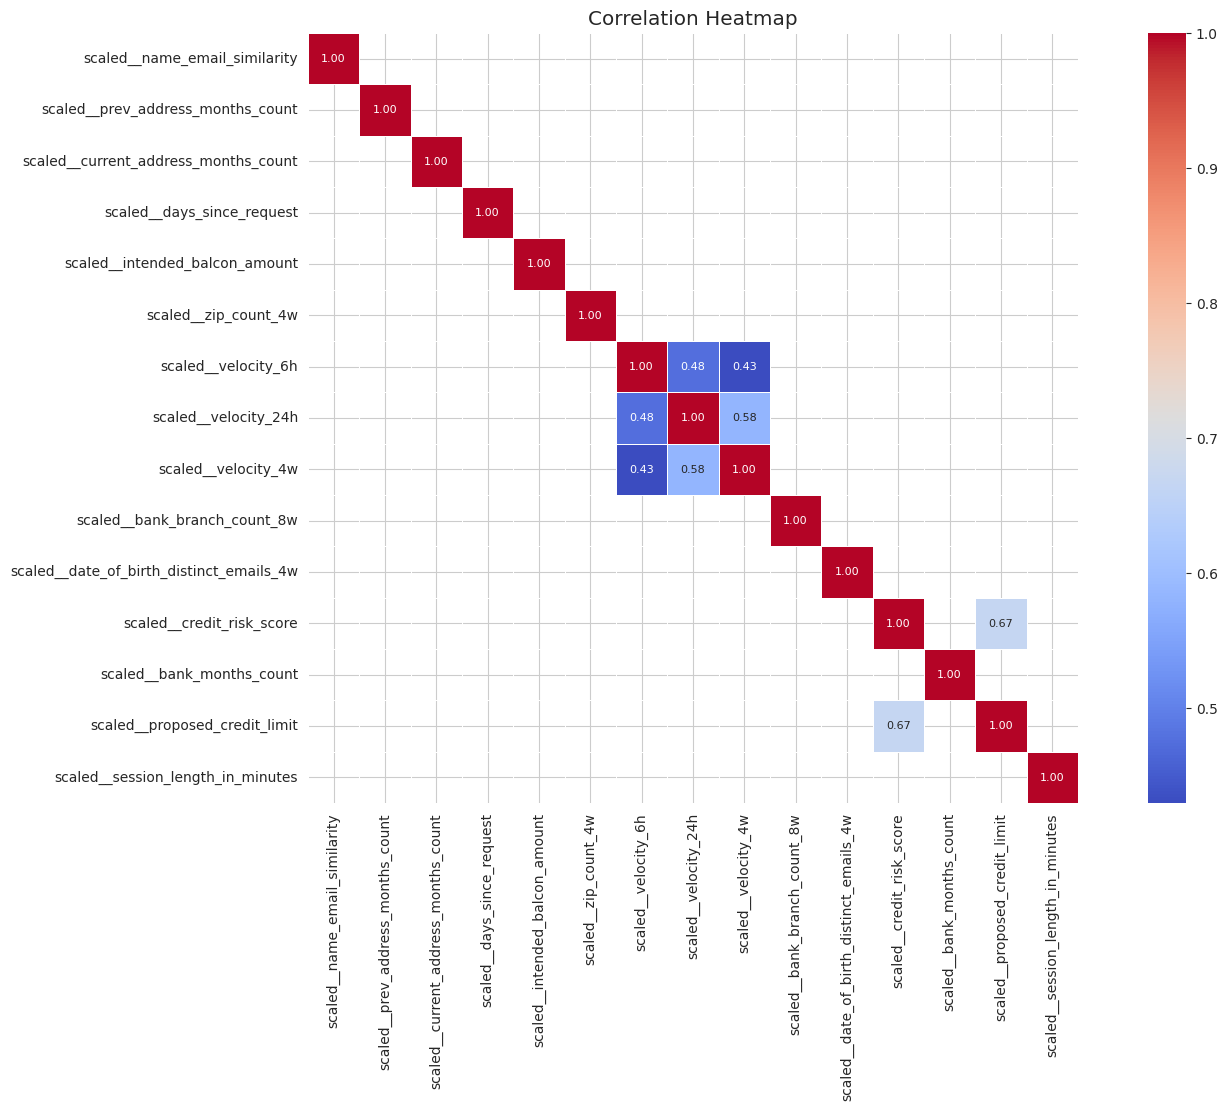

In [ ]:
# Compute correlation matrix
X_train_corr = X_scaled_nm[numeric_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_train_corr[(X_train_corr >= 0.4) | (X_train_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

To assess multicollinearity within the dataset, Pearson correlation coefficient was employed as a measure of linear relationship between features. This statistical analysis helped identify potential correlations between variables. Fortunately, no features displayed a correlation exceeding 0.67, indicating a lack of strong linear dependencies.

### 3.3 Chi-Squared Test for Categorical Features

In [ ]:
# Check the distribution of values in a column
X_scaled_nm.device_distinct_emails_8w.value_counts()

,count
device_distinct_emails_8w,
1.0,20865
2.0,1038
0.0,151
-1.0,4


In [ ]:
# Identify the rows to drop based on a condition on a specific feature
rows_to_drop = np.where(X_scaled_nm['device_distinct_emails_8w'] < 0)[0]
rows_to_drop

# Drop the corresponding rows in X_train and y_train
X_train_cat = X_scaled_nm[categorical_features].copy()
X_train_cat.drop(rows_to_drop, axis=0, inplace=True)

y_train_cat = y_scaled_nm.copy()
y_train_cat.drop(rows_to_drop, axis=0, inplace=True)

In [ ]:
# Use chi-squared test to evaluate the relationship between categorical features and the target variable
chi2_results = chi2(X_train_cat, y_train_cat)

In [ ]:
# Create a pandas DataFrame to store the chi-squared test results
chi2_results_df = pd.DataFrame(data={'feature': X_train_cat.columns, 'chi2': chi2_results[0], 'p_value': chi2_results[1]})

/tmp/ipython-input-2346821528.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)
/tmp/ipython-input-2346821528.py:5: UserWarning: 
The palette list has fewer values (2) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)


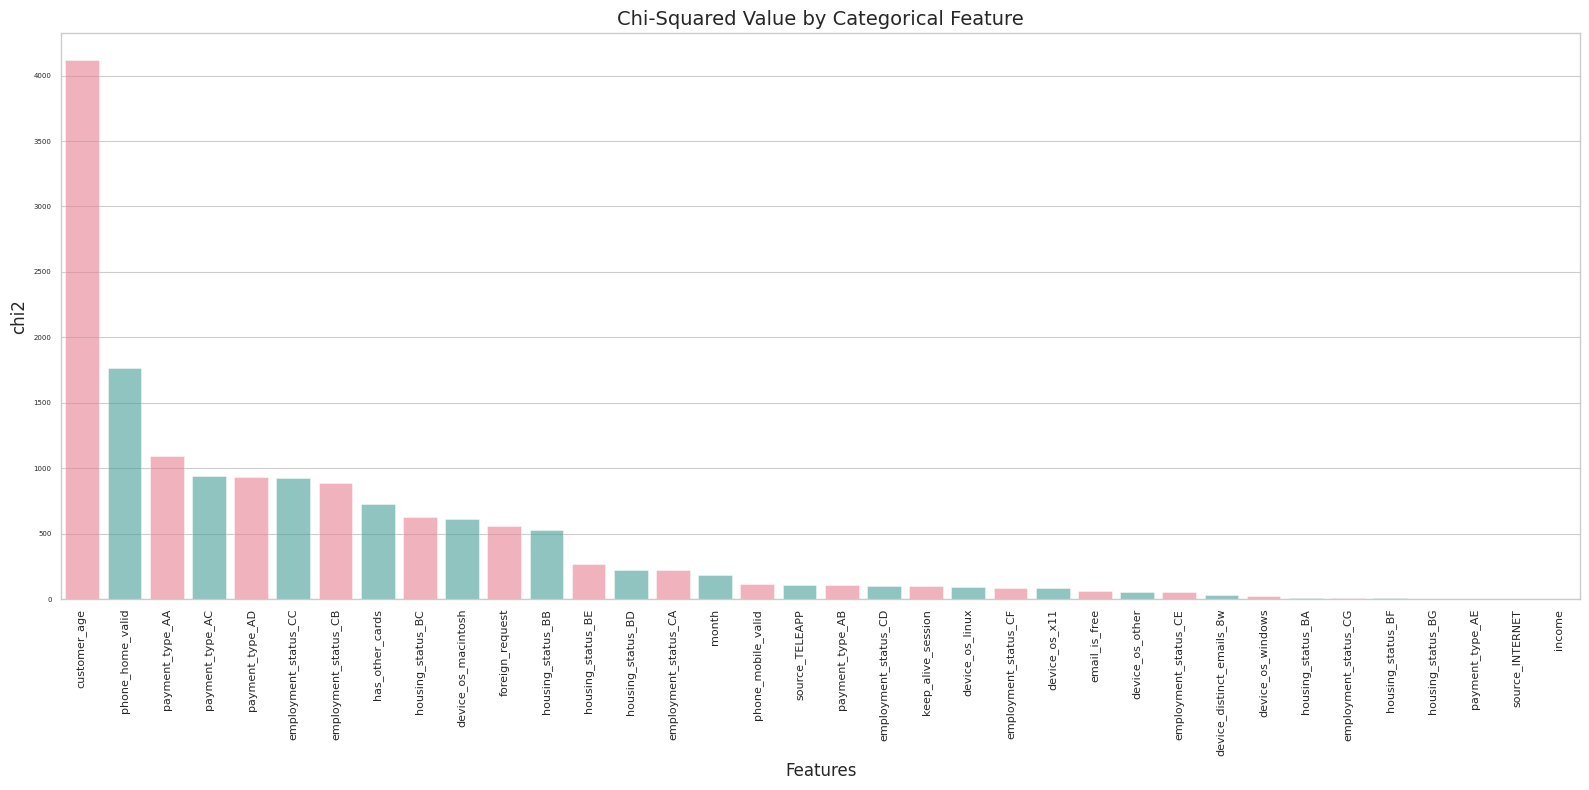

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Categorical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

To explore the connection between categorical features and the target variable, a chi-squared test was conducted. This statistical analysis allowed us to evaluate the relationship between the categorical variables and the target feature. The results of the chi-squared test unveiled an intriguing insight: among the examined categorical features, `customer_age` stood out as the most influential predictor of the target variable.

In [ ]:
# Use SelectKBest with chi-squared test to select the top 5 categorical features that are most strongly associated with the target variable
best_chi2_cols = SelectKBest(chi2, k=15)
best_chi2_cols.fit(X_train_cat, y_train_cat)

# Get the names of the top 5 features
best_chi2_features = [X_train_cat.columns[best_chi2_cols.get_support()]]

# Print the names of the top 5 features
print(best_chi2_features)

[Index(['customer_age', 'phone_home_valid', 'has_other_cards',
       'foreign_request', 'payment_type_AA', 'payment_type_AC',
       'payment_type_AD', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BD', 'housing_status_BE', 'device_os_macintosh'],
      dtype='object')]


### 3.4 Mutual Information Test for Numeric Features

In [ ]:
# Create a new DataFrame with only the numeric features from the preprocessed training data
X_train_num = X_scaled_nm[numeric_features].copy()

# Create a copy of the target variable
y_train_num = y_scaled_nm.copy()

In [ ]:
# Use mutual information test to evaluate the relationship between numerical features and the target variable
mutual_info_results = mutual_info_classif(X_train_num, y_train_num)

In [ ]:
# Create a pandas DataFrame to store the mutual information test results
mutual_info_results_df = pd.DataFrame(data={'feature': X_train_num.columns, 'mutual_info': mutual_info_results})

/tmp/ipython-input-3569312709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)
/tmp/ipython-input-3569312709.py:5: UserWarning: 
The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)


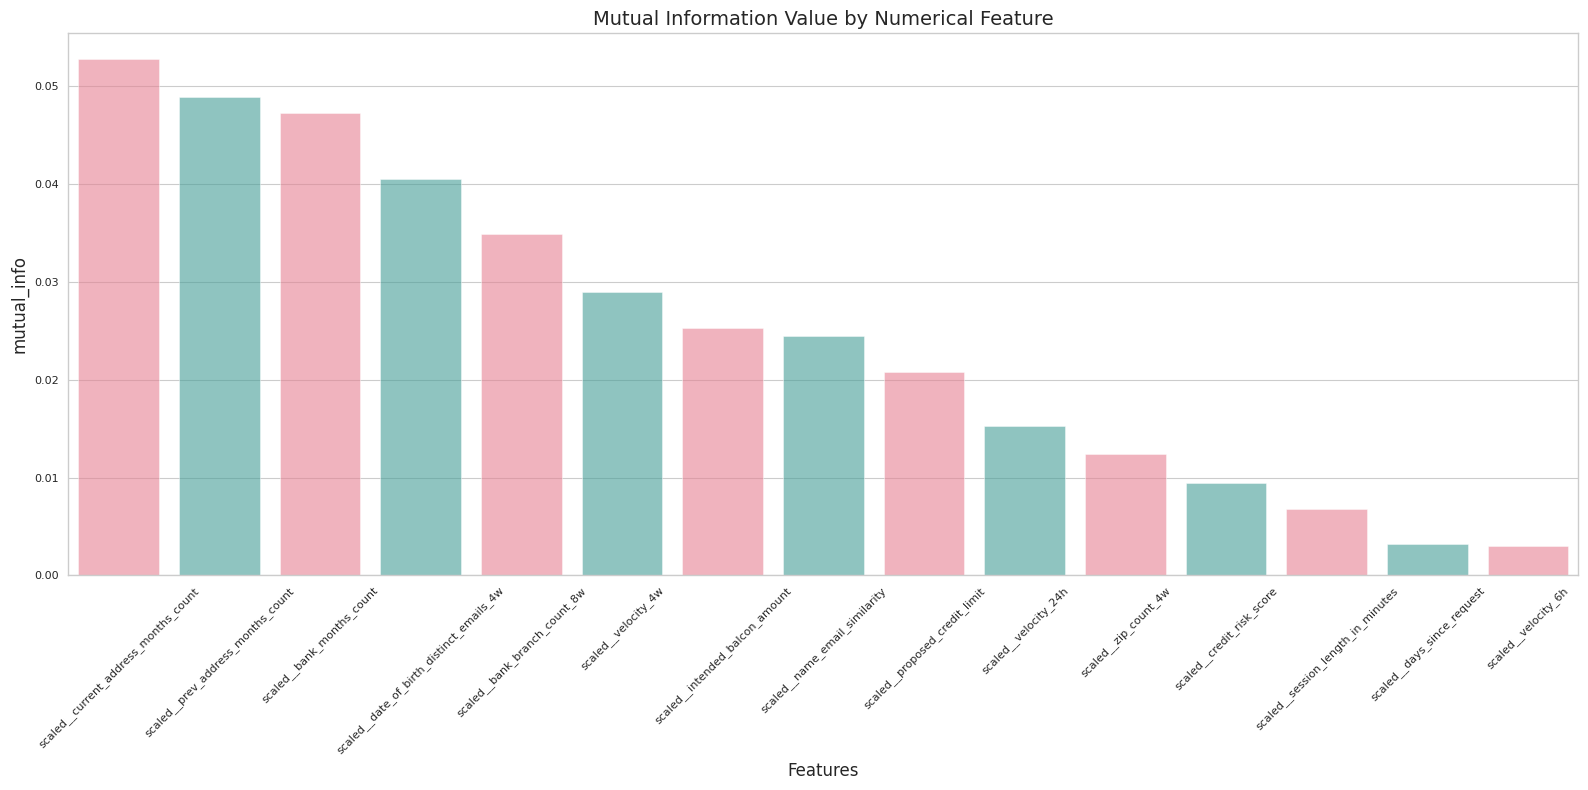

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("mutual_info", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Mutual Information Value by Numerical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

To explore the connection between numeric features and the target variable, a mutual information test was conducted. This statistical analysis allowed us to evaluate the relationship between the numeric variables and the target feature. The results of the mutual information test unveiled an intriguing insight: among the examined numeric features, `bank_months_count`, `current_address_months_count`, and `prev_address_months_count` stood out as the most influential predictor of the target variable.

In [ ]:
# Use SelectKBest with mutual information test to select the top 5 numerical features that are most strongly associated with the target variable
best_mutual_info_cols = SelectKBest(mutual_info_classif, k=15)
best_mutual_info_cols.fit(X_train_num, y_train_num)

# Get the names of the top 5 features
best_mutual_info_features = [X_train_num.columns[best_mutual_info_cols.get_support()]]

# Print the names of the top 5 features
print(best_mutual_info_features)

[Index(['scaled__name_email_similarity', 'scaled__prev_address_months_count',
       'scaled__current_address_months_count', 'scaled__days_since_request',
       'scaled__intended_balcon_amount', 'scaled__zip_count_4w',
       'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w',
       'scaled__bank_branch_count_8w',
       'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score',
       'scaled__bank_months_count', 'scaled__proposed_credit_limit',
       'scaled__session_length_in_minutes'],
      dtype='object')]


### 3.5 Extra Trees Classifier for Feature Selection

In [ ]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_nm, y_scaled_nm)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled_nm.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(best_extra_features)

['scaled__name_email_similarity', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AC', 'payment_type_AD', 'employment_status_CA', 'housing_status_BC', 'device_os_windows']


In [ ]:
extra_importances = pd.DataFrame({'feature': X_scaled_nm.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

/tmp/ipython-input-2214829763.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)


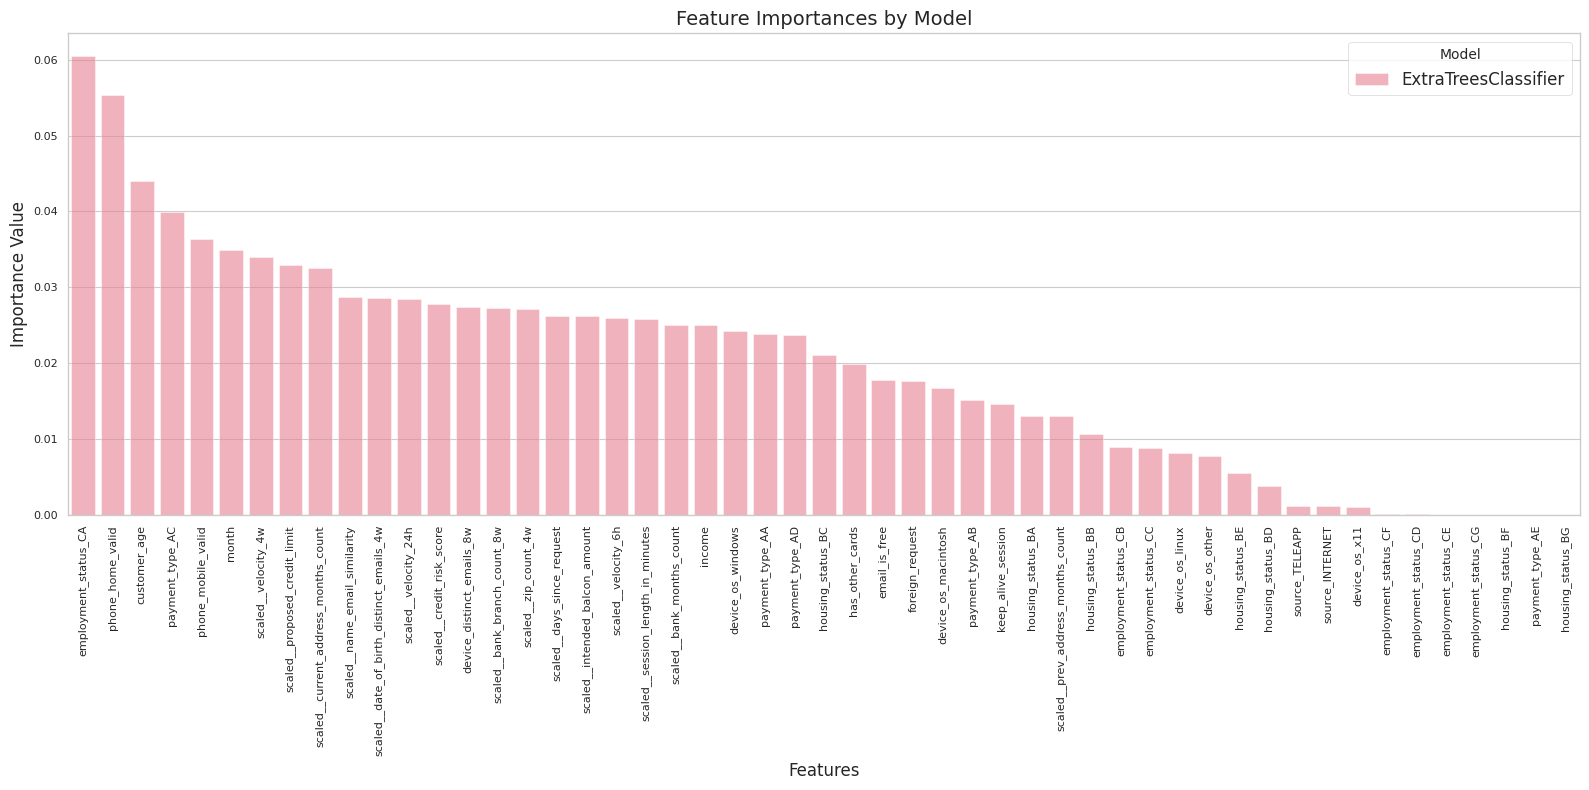

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The decision to employ the ExtraTreesClassifier for feature selection was motivated by its robustness and compatibility with our dataset. In contrast to the chi-squared and mutual information tests, the ExtraTreesClassifier yielded different outcomes. After evaluating various features using this model, we identified the most influential predictors for the target feature. Notably, `employment_status_CA`, `phone_home_valid`, `customer_age`, `payment_type_AC`, and `phone_mobile_valid` emerged as the top features.

# 4. Fraud Detection Model Training Functions using SMOTE and Grid Search CV

SMOTE (Synthetic Minority Over-sampling Technique) is an over-sampling technique used to tackle class imbalance problems. Unlike random under-sampling, SMOTE generates synthetic data points to create an equal balance between the minority and majority class. It picks the distance between the closest neighbors of the minority class to create new synthetic points. SMOTE retains more information since no rows are eliminated, unlike random under-sampling. However, SMOTE can take longer to train due to the generation of synthetic data.

When using SMOTE or undersampling techniques, it is crucial not to apply them before cross-validation. This is because it can influence the validation set before the cross-validation process, leading to overfitting. By doing so, we risk introducing data leakage. Instead, we should generate synthetic data points during cross-validation to avoid affecting the validation set. In this way, synthetic data is created only for the training set, ensuring that the validation set remains untouched.

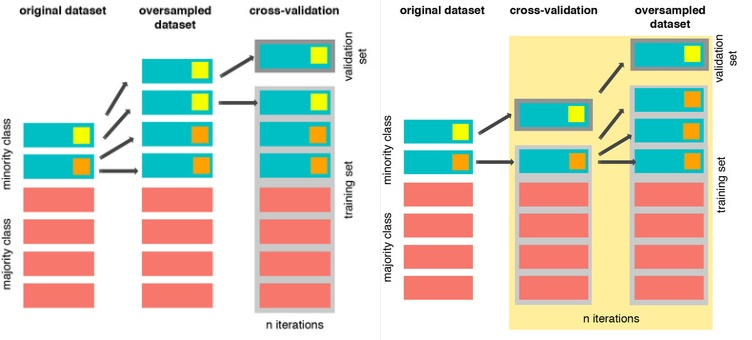

In [ ]:
# Import the necessary libraries for oversampling imbalanced datasets
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline

In [ ]:
# Import necessary modules for hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

In [ ]:
def train_classifier(classifier, param_dist, X_train, y_train, encoded_features, search_type='random'):
    """
    Train a classifier using the specified parameters and return the trained model.

    Parameters:
    classifier (sklearn estimator): The estimator to train.
    param_dist (dict): The distribution of parameters to search over.
    X_train (pandas DataFrame): The training features.
    y_train (pandas Series): The training target.
    encoded_features (list): A list of encoded categorical features.
    search_type (str, optional): The type of hyperparameter search to perform. Must be either 'random' or 'grid'. Defaults to 'random'.

    Returns:
    A trained classifier.
    """

    # Apply SMOTENC to deal with imbalanced classes
    smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)

    # Create pipeline with SMOTENC and the classifier
    pipeline = make_pipeline(smote_nc, classifier)

    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform hyperparameter search
    if search_type == 'random':
        search_cv = RandomizedSearchCV(estimator=pipeline,
                                      param_distributions=param_dist,
                                      n_iter=20,
                                      scoring="roc_auc",
                                      n_jobs=-1,
                                      cv=cv)
    elif search_type == 'grid':
        search_cv = GridSearchCV(estimator=pipeline,
                                 param_grid=param_dist,
                                 scoring="roc_auc",
                                 n_jobs=-1,
                                 cv=cv)
    else:
        raise ValueError('search_type must be either "random" or "grid"')

    # Fit the model and return the trained classifier
    search_cv.fit(X_train, y_train)

    return search_cv


# 5. Fraud Detection Model Testing Functions using Recall and ROC-AUC

Accuracy alone may not be a reliable metric for evaluating bank account fraud models, especially when dealing with imbalanced datasets. Instead, precision, recall, and F1 score are better options. Among these metrics, recall at a 5% FPR is ideal for minimising false negatives and reducing the risk of flagging legitimate transactions as fraudulent, which can lead to customer attrition. Prioritising the identification of fraudulent transactions while minimising false positives can help prevent customer loss.

In addition, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are also useful tools for evaluating the performance of fraud detection models. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR), allowing one to assess the trade-off between sensitivity and specificity. AUC measures the overall performance of the model, with a higher value indicating better performance. While recall at a 5% FPR is the primary metric for this project, ROC and AUC can provide additional insights into the model's performance.

<br>

$$ Recall = {TP \over TP + FN}  $$

<br>

$$ False\;Positive\;Rate = {FP \over FP + TN} $$

<br>

In [ ]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

### 5.1 Classification Report for Model Testing

In [ ]:
def print_cls_report(y_test, y_pred, title):
    # Calculate the classification report
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])

    # Calculate precision, recall, f1 score and support for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print the title and the default classification report
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return the recall scores for each class
    return recall

### 5.2 Confusion Matrix for Model Testing

In [ ]:
def plot_con_matrix(ax, y_test, y_pred, title):
    # Define the classes of the classification problem
    classes = ['No Fraud', 'Fraud']

    # Compute the confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    # Compute the values for true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = con_matrix.ravel()

    # Compute the false positive rate
    fpr = fp / (fp + tn)

    # Plot the confusion matrix using a heatmap
    ax.imshow(con_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Define the tick marks and the labels for the plot
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    # Add the count of each cell of the confusion matrix to the plot
    fmt = 'd'
    threshold = con_matrix.max() / 2.
    for i, j in np.ndindex(con_matrix.shape):
        ax.text(j, i, format(con_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if con_matrix[i, j] > threshold else "black")

    # Add labels to the plot
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{title} with {fpr*100:.2f}% FPR')

### 5.3 Cross-Validation Results for Model Testing

In [ ]:
def print_cv_results(model):
    # Get the parameter and score arrays from the cv_results_ dictionary
    means = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']

    # Combine the arrays using zip()
    combined_results = zip(means, params)

    # Sort the combined array by mean_test_score in descending order
    sorted_results = sorted(combined_results, key=lambda x: x[0], reverse=True)

    # Print the mean test score and the hyperparameters as a formatted string
    for mean, param in sorted_results:
        print("mean_test_score: %f, params: %r" % (mean, param))

### 5.4 ROC-AUC for Model Testing

In [ ]:
def plot_roc_curves(fpr_list, tpr_list, label_list):
    plt.figure(figsize=(8, 8))
    for i in range(len(fpr_list)):
        # Compute the ROC AUC score
        roc_auc_score = auc(fpr_list[i], tpr_list[i])
        # Plot the ROC curve
        plt.plot(fpr_list[i], tpr_list[i], label=f'{label_list[i]} (AUC={roc_auc_score:.2f})')

    # Plot the random classifier curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # Set the plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [ ]:
def test_classifier(classifier, X_test, y_test):
    """
    Evaluates a binary classifier by generating ROC curves, classification reports, and confusion matrices.

    Parameters:
    -----------
    classifier : classifier object
        Binary classifier object to be evaluated.
    X_test : numpy.ndarray or pandas.DataFrame
        Test feature data.
    y_test : numpy.ndarray or pandas.Series
        Test target labels.

    Returns:
    --------
    tuple : A tuple containing four values - false positive rate (fpr), true positive rate (tpr),
            default recall, and target recall.
    """

    # Predict class probabilities and labels using the trained classifier
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate and true positive rate for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Choose a false positive rate threshold based on the ROC curve
    target_fpr = 0.05
    threshold_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[threshold_idx]

    # Make predictions on the testing set using the threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)

    # Print the classification report for both default and target threshold
    default_recall = print_cls_report(y_test, y_pred, title="Default Threshold")
    target_recall = print_cls_report(y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Plot confusion matrix
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    default_matrix = plot_con_matrix(ax1, y_test, y_pred, title='Default Threshold @ 0.50')
    target_matrix = plot_con_matrix(ax2, y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Adjust subplots for better visibility
    plt.tight_layout()

    # Display the plots
    plt.show()

    return fpr, tpr, default_recall, target_recall


# 6. Tree-Based Machine Learning Algorithms for Fraud Detection of Bank Account Applications

Tree-based models like XGBoost and LightGBM are ideal for this imbalanced dataset. They handle outliers effectively and excel in classifying tabular data. These algorithms do not require feature scaling and can automatically select the most important features, eliminating the need for manual feature engineering. By capturing intricate relationships and utilising informative features, they provide reliable predictions even with unusual data points. With their robustness, performance, and feature selection capabilities, tree-based models offer a comprehensive and powerful solution for this task.

In [ ]:
# Importing tree-based classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Resampling for Effective Model Training

In [ ]:
# Read the CSV file into a Pandas DataFrame
csv_file_path = os.path.join(sgpjesus_bank_account_fraud_dataset_neurips_2022_path, 'Base.csv')
df = pd.read_csv(csv_file_path)

In [ ]:
new_df = df.copy()

In [ ]:
# Create a list of numeric features in the DataFrame df
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


In [ ]:
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [ ]:
# Convert categorical variables into dummy variables using one-hot encoding
new_df = pd.DataFrame(pd.get_dummies(new_df, prefix=categorical_features))
new_df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
       'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC',
       'payment_type_AD', 'payment_type_AE', 'employment_status_CA',
       'employment_status_CB', 'employment_status_CC', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'employment_status_CG',
       'housing_status_BA', 'housing_status_BB', 'housing_status_BC',
     

In [ ]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

In [ ]:
# Dropping constant features from Variance Threshold test
X.drop(['device_fraud_count'], axis=1, inplace=True)

# Selecting features from ExtraTreesClassifier test
selected_features = [feature.replace('scaled__', '') for feature in best_extra_features]
X = X[selected_features]

In [ ]:
%%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 0.1 and all available CPU cores
nm = NearMiss(sampling_strategy=0.1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_nm, y_nm = nm.fit_resample(X, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_nm))

Test dataset samples per class Counter({0: 988971, 1: 11029})
Resampled dataset shape Counter({0: 110290, 1: 11029})
CPU times: user 1min 2s, sys: 210 ms, total: 1min 2s
Wall time: 1min 4s


In [ ]:
# Import the necessary library for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.25, random_state=42, stratify=y_nm)

In [ ]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]

### 6.1 Tree-Based Algorithm 1: DecisionTree

In [ ]:
# Instantiate a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Define a dictionary of hyperparameters for DecisionTreeClassifier
dt_params = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
             'decisiontreeclassifier__max_depth': [2, 4, 6, 8, 10],
             'decisiontreeclassifier__max_features': ['sqrt', 'log2']
            }

In [ ]:
%%time

# Train a DecisionTree classifier using 'train_classifier' function and the given parameters
dt_model = train_classifier(dt, dt_params, X_train, y_train, encoded_features)

CPU times: user 24.1 s, sys: 2.13 s, total: 26.2 s
Wall time: 24min 27s


In [ ]:
print_cv_results(dt_model)

mean_test_score: 0.840346, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.836501, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.835448, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'gini'}
mean_test_score: 0.834451, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'gini'}
mean_test_score: 0.834237, params: {'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.829843, params: {'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclass

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.90      0.93     27573
       Fraud       0.38      0.61      0.47      2757

    accuracy                           0.87     30330
   macro avg       0.67      0.76      0.70     30330
weighted avg       0.91      0.87      0.89     30330

Target Threshold @ 0.71
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.95      0.95      0.95     27573
       Fraud       0.49      0.48      0.49      2757

    accuracy                           0.91     30330
   macro avg       0.72      0.72      0.72     30330
weighted avg       0.91      0.91      0.91     30330



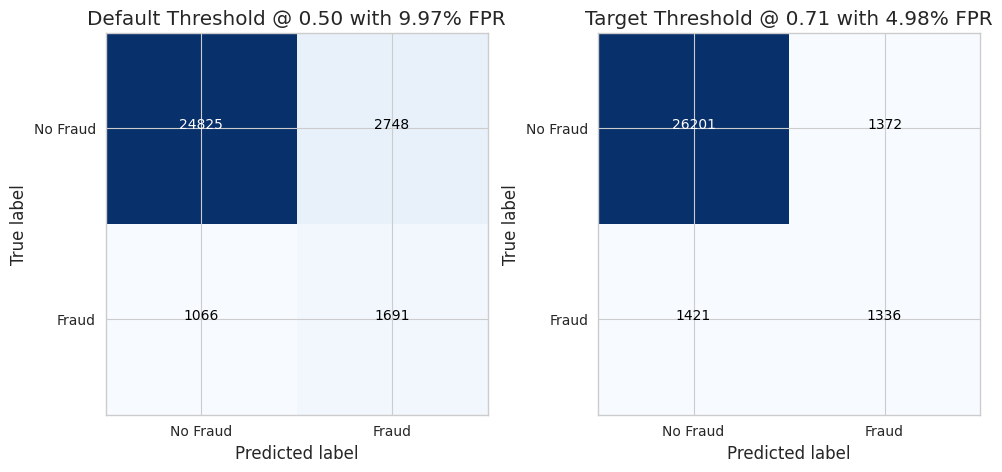

In [ ]:
# Testing the DecisionTree model using the test data and calculating metrics
dt_fpr, dt_tpr, dt_default_recall, dt_target_recall = test_classifier(dt_model, X_test, y_test)

**Using a classification threshold of 0.71:**

* *True Positives (TP)*: The DecisionTree model successfully captured 1259 out of 2757 positive instances.

* *False Positives (FP)*:  There were 1407 instances where the model incorrectly classified negative instances as positive. (FP)

* *True Negatives (TN)*:  It also correctly classified 26166 negative instances as true negatives (TN).

* *False Negatives (FN)*:  There were 1498 instances where it failed to capture the positive class (FN).

### 6.2 Tree-Based Algorithm 2: RandomForest

In [ ]:
# Instantiate a RandomForestClassifier model
rf = RandomForestClassifier()

# Define a dictionary of hyperparameters for RandomForestClassifier
rf_params = {'randomforestclassifier__n_estimators': [20, 40, 60, 80, 100],
            'randomforestclassifier__criterion': ['gini', 'entropy'],
            'randomforestclassifier__max_depth': [2, 4, 6, 8, 10],
            'randomforestclassifier__max_features': ['sqrt', 'log2']
            }

In [ ]:
%%time

# Train a RandomForest classifier using 'train_classifier' function and the given parameters
rf_model = train_classifier(rf, rf_params, X_train, y_train, encoded_features)

CPU times: user 42.5 s, sys: 2.13 s, total: 44.6 s
Wall time: 35min 50s


In [ ]:
print_cv_results(rf_model)

mean_test_score: 0.909309, params: {'randomforestclassifier__n_estimators': 60, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.907916, params: {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.906529, params: {'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.905741, params: {'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.904965, params: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'log2', 'randomfo

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.92      0.94     27573
       Fraud       0.47      0.71      0.57      2757

    accuracy                           0.90     30330
   macro avg       0.72      0.82      0.76     30330
weighted avg       0.92      0.90      0.91     30330

Target Threshold @ 0.58
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.95      0.95     27573
       Fraud       0.55      0.60      0.57      2757

    accuracy                           0.92     30330
   macro avg       0.75      0.78      0.76     30330
weighted avg       0.92      0.92      0.92     30330



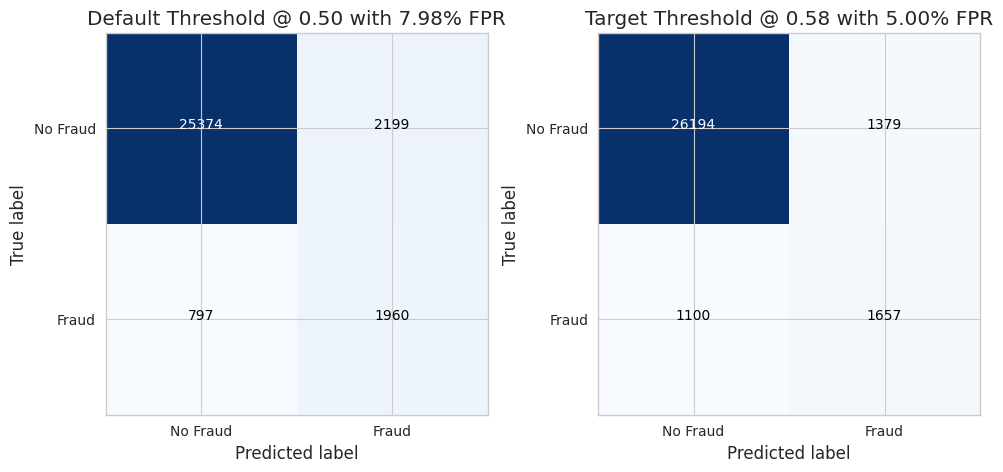

In [ ]:
# Testing the RandomForest model using the test data and calculating metrics
rf_fpr, rf_tpr, rf_default_recall, rf_target_recall = test_classifier(rf_model, X_test, y_test)

**Using a classification threshold of 0.54:**

* *True Positives (TP)*: The RandomForest model successfully captured 1765 out of 2757 positive instances.

* *False Positives (FP)*:  there were 1379 instances where the model incorrectly classified negative instances as positive.

* *True Negatives (TN)*:  It also correctly classified 26194 negative instances as true negatives (TN).

* *False Negatives (FN)*:  There were 992 instances where it failed to capture the positive class (FN).

### 6.3 Tree-Based Algorithm 3: XGBoost

In [ ]:
# Instantiate a XGBClassifier model with GPU acceleration for training
xgb = XGBClassifier(tree_method='gpu_hist')

# Define a dictionary of hyperparameters for XGBClassifier
xgb_params = {'xgbclassifier__n_estimators': [20, 40, 60, 80, 100],
              'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
              'xgbclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
              'xgbclassifier__min_child_weight': [1, 2, 3, 4],
              'xgbclassifier__subsample': [0.6, 0.8, 1.0],
              'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]
             }

In [ ]:
%%time

# Train a XGBoost classifier using 'train_classifier' function and the given parameters
xgb_model = train_classifier(xgb, xgb_params, X_train, y_train, encoded_features)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:47:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


CPU times: user 24.3 s, sys: 1.94 s, total: 26.2 s
Wall time: 24min 32s


In [ ]:
print_cv_results(xgb_model)

mean_test_score: 0.934475, params: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__colsample_bytree': 0.8}
mean_test_score: 0.934432, params: {'xgbclassifier__subsample': 0.8, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 0.6}
mean_test_score: 0.932657, params: {'xgbclassifier__subsample': 0.8, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 0.6}
mean_test_score: 0.932232, params: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__min_child_weight': 3, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__colsample_bytree': 

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.96      0.96     27573
       Fraud       0.64      0.68      0.66      2757

    accuracy                           0.94     30330
   macro avg       0.80      0.82      0.81     30330
weighted avg       0.94      0.94      0.94     30330

Target Threshold @ 0.42
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.95      0.96     27573
       Fraud       0.59      0.71      0.65      2757

    accuracy                           0.93     30330
   macro avg       0.78      0.83      0.80     30330
weighted avg       0.94      0.93      0.93     30330



/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [18:47:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: UserWarning: [18:47:34] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


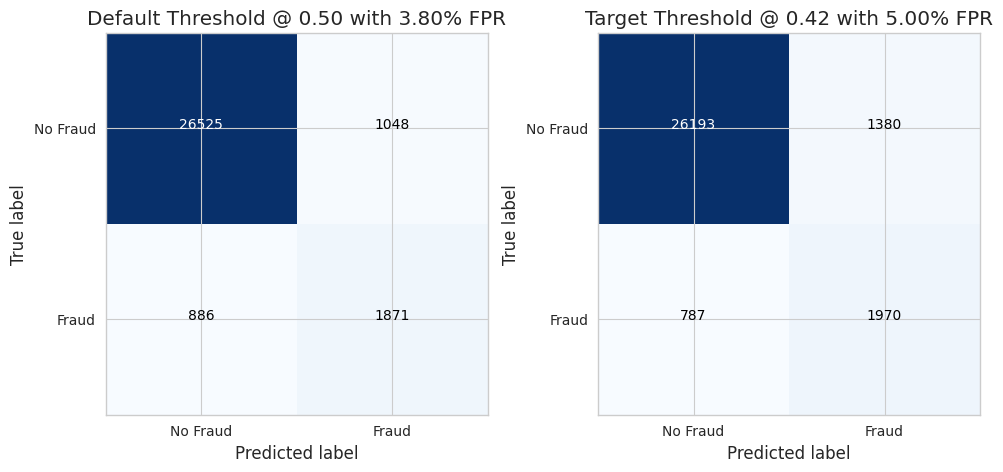

In [ ]:
# Testing the XGBoost model using the test data and calculating metrics
xgb_fpr, xgb_tpr, xgb_default_recall, xgb_target_recall = test_classifier(xgb_model, X_test, y_test)

**Using a classification threshold of 0.26:**

* *True Positives (TP)*: The RandomForest model successfully captured 2148 out of 2757 positive instances.

* *False Positives (FP)*:  there were 1377 instances where the model incorrectly classified negative instances as positive.

* *True Negatives (TN)*:  It also correctly classified 26196 negative instances as true negatives (TN).

* *False Negatives (FN)*:  There were 609 instances where it failed to capture the positive class (FN).

### 6.4 Tree-Based Algorithm 4: LightGBM

In [ ]:
# Instantiate a LGBMClassifier model with GPU acceleration for training
lgb = LGBMClassifier(device='gpu')

# Define a dictionary of hyperparameters for LGBMClassifier
lgb_params = {'lgbmclassifier__max_depth': [2, 4, 6, 8, 10],
               'lgbmclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
               'lgbmclassifier__n_estimators': [20, 40, 60, 80, 100],
               'lgbmclassifier__min_child_weight': [1, 2, 3, 4],
               'lgbmclassifier__subsample': [0.6, 0.8, 1.0],
               'lgbmclassifier__colsample_bytree': [0.6, 0.8, 1.0]
              }

In [ ]:
%%time

# Train a LightGBM classifier using 'train_classifier' function and the given parameters
lgb_model = train_classifier(lgb, lgb_params, X_train, y_train, encoded_features)

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Number of positive: 82717, number of negative: 82717
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3181
[LightGBM] [Info] Number of data points in the train set: 165434, number of used features: 27
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (3.16 MB) transferred to GPU in 0.006234 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
CPU times: user 25.5 s, sys: 2.33 s, total: 27.8 s
Wall time: 25min 36s


In [ ]:
print_cv_results(lgb_model)

mean_test_score: 0.933042, params: {'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__min_child_weight': 2, 'lgbmclassifier__max_depth': 6, 'lgbmclassifier__learning_rate': 0.2, 'lgbmclassifier__colsample_bytree': 0.8}
mean_test_score: 0.931247, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__min_child_weight': 3, 'lgbmclassifier__max_depth': 6, 'lgbmclassifier__learning_rate': 0.15, 'lgbmclassifier__colsample_bytree': 1.0}
mean_test_score: 0.926810, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__n_estimators': 80, 'lgbmclassifier__min_child_weight': 1, 'lgbmclassifier__max_depth': 10, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__colsample_bytree': 1.0}
mean_test_score: 0.915152, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__n_estimators': 80, 'lgbmclassifier__min_child_weight': 4, 'lgbmclassifier__max_depth': 10, 'lgbmclassifier__learning_rate': 0.05, 'lgbmclassi

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.96      0.96     27573
       Fraud       0.62      0.69      0.65      2757

    accuracy                           0.93     30330
   macro avg       0.79      0.83      0.81     30330
weighted avg       0.94      0.93      0.93     30330

Target Threshold @ 0.45
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.95      0.96     27573
       Fraud       0.59      0.71      0.65      2757

    accuracy                           0.93     30330
   macro avg       0.78      0.83      0.80     30330
weighted avg       0.94      0.93      0.93     30330



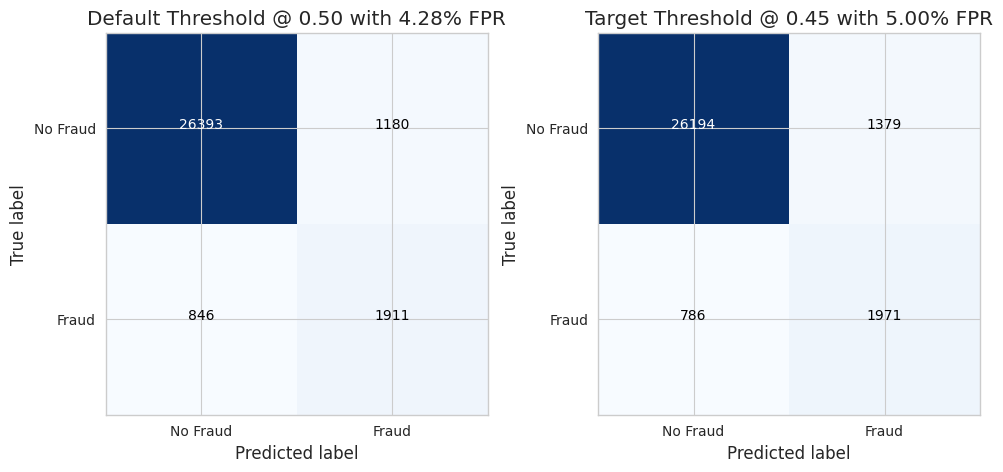

In [ ]:
# Testing the LightGBM model using the test data and calculating metrics
lgb_fpr, lgb_tpr, lgb_default_recall, lgb_target_recall = test_classifier(lgb_model, X_test, y_test)

**Using a classification threshold of 0.30:**

* *True Positives (TP)*: The RandomForest model successfully captured 2130 out of 2757 positive instances.

* *False Positives (FP)*:  there were 1380 instances where the model incorrectly classified negative instances as positive.

* *True Negatives (TN)*:  It also correctly classified 26193 negative instances as true negatives (TN).

* *False Negatives (FN)*:  There were 627 instances where it failed to capture the positive class (FN).

### 6.5 Plotting ROC Curves and Comparing AUC Scores

In [ ]:
# Create lists of FPR and TPR values for each classifier
fpr_list = [dt_fpr, rf_fpr, xgb_fpr, lgb_fpr]
tpr_list = [dt_tpr, rf_tpr, xgb_tpr, lgb_tpr]

# Create a list of labels for each classifier
label_list = ['DecisionTree', 'RandomForest', 'XGBoost', 'LightGBM']

# Plot ROC curves for each classifier using the FPR, TPR, and label lists
plot_roc_curves(fpr_list, tpr_list, label_list)


The ROC-AUC results demonstrate the performance of different models in classifying the data. The DecisionTree model achieved an AUC of 0.84, indicating moderate predictive capability. The RandomForest model outperformed it with an AUC of 0.92, showcasing better predictive accuracy. Both XGBoost and LightGBM models exhibited superior performance, achieving an AUC of 0.95 each, suggesting excellent predictive power. The Random model, with an AUC of 0.5, performed randomly, indicating no predictive capability. These results highlight the varying effectiveness of the models in distinguishing between positive and negative instances, with XGBoost and LightGBM showcasing the highest discriminative ability.

### 6.6 Plotting Recall Scores for Fraud Class at Default and Target Thresholds

In [ ]:
# Create a dataframe with the recall scores for each model
data = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Default Recall Score': [dt_default_recall[1], rf_default_recall[1], xgb_default_recall[1], lgb_default_recall[1]],
    'Target Threshold Recall Score': [dt_target_recall[1], rf_target_recall[1], xgb_target_recall[1], lgb_target_recall[1]]
})

# Sort the data by the threshold recall score in descending order
data = data.sort_values(by='Target Threshold Recall Score', ascending=False)

# Reshape the data
data = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Score')

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(
    data=data,
    x='Model',
    y='Score',
    hue='Metric',
    palette=my_palette,
    alpha=.6,
)

# Customize labels and legend
plt.xlabel("Model", fontsize=12)
plt.ylabel("Recall Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Recall Scores for Fraud Class by Model and Threshold", fontsize=14)
plt.legend(title="Metric", fontsize=10)

# Display plot
plt.show()

The recall at a 5% false positive rate provides insights into the models' ability to accurately identify positive instances while maintaining a low false positive rate. The DecisionTree model achieved a recall of 0.46, indicating that it correctly identified 46% of positive instances while maintaining the desired false positive rate. The RandomForest model performed better, achieving a recall of 0.64, indicating a higher proportion of correctly identified positive instances. Both XGBoost and LightGBM models demonstrated even higher recall values, with XGBoost achieving 0.78 and LightGBM achieving 0.77, showcasing their superior performance in accurately capturing positive instances while maintaining the specified false positive rate. These results highlight the varying effectiveness of the models in identifying positive instances while controlling the false positive rate, with XGBoost and LightGBM outperforming the other models.

# 7. Exporting Trained Machine Learning Model for Real-World Deployment

In [ ]:
# Importing the pickle library to save and load machine learning models
import pickle

In [ ]:
# Pickle the model
pickle.dump(dt_model, open('./models/dt_model.pkl', 'wb'))
pickle.dump(rf_model, open('./models/rf_model.pkl', 'wb'))
pickle.dump(xgb_model, open('./models/xgb_model.pkl', 'wb'))
pickle.dump(lgb_model, open('./models/lgb_model.pkl', 'wb'))

In [ ]:
# Load pickled model
dt_model = pickle.load(open('./models/dt_model.pkl', 'rb'))
rf_model = pickle.load(open('./models/rf_model.pkl', 'rb'))
xgb_model = pickle.load(open('./models/xgb_model.pkl', 'rb'))
lgb_model = pickle.load(open('./models/lgb_model.pkl', 'rb'))

### 7.1 Training the Final XGBoost Model with Optimal Hyperparameters

I encountered difficulties when attempting to deploy a pickled XGBoost model that included a pipeline or was trained using GPU. It seems there were compatibility issues, and I needed to handle additional dependencies and configurations to ensure successful deployment in the target environment. To address these challenges, I decided to proceed by selecting the best hyperparameters obtained through the optimisation process and training the model using CPU instead. This approach has proven effective in resolving the deployment issues I encountered, allowing me to continue with my project for now.

In [ ]:
# Apply SMOTENC to deal with imbalanced classes
smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)

In [ ]:
%%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Train dataset samples per class {Counter(y_train)}')

# Apply SMOTENC to deal with imbalanced classes
sm = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)

# Perform SMOTE oversampling on the feature matrix X_nm and target variable y_nm
X_sm, y_sm = sm.fit_resample(X_train, y_train)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_sm))

Train dataset samples per class Counter({0: 82717, 1: 8272})
Resampled dataset shape Counter({0: 82717, 1: 82717})
CPU times: user 5min 58s, sys: 584 ms, total: 5min 59s
Wall time: 2min 9s


In [ ]:
# Instantiate final XGBClassifier model with GPU acceleration for training
xgb_final = XGBClassifier(n_estimators = 100,
                        max_depth = 10,
                        learning_rate = 0.15,
                        min_child_weight = 2,
                        subsample = 0.6,
                        colsample_bytree = 0.8
                        )

In [ ]:
# Train final XGBoost classifier using the best parameters
xgb_final.fit(X_sm, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.98      0.97     27573
       Fraud       0.76      0.67      0.71      2757

    accuracy                           0.95     30330
   macro avg       0.86      0.82      0.84     30330
weighted avg       0.95      0.95      0.95     30330

Target Threshold @ 0.24
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.98      0.95      0.96     27573
       Fraud       0.61      0.78      0.68      2757

    accuracy                           0.93     30330
   macro avg       0.79      0.86      0.82     30330
weighted avg       0.94      0.93      0.94     30330



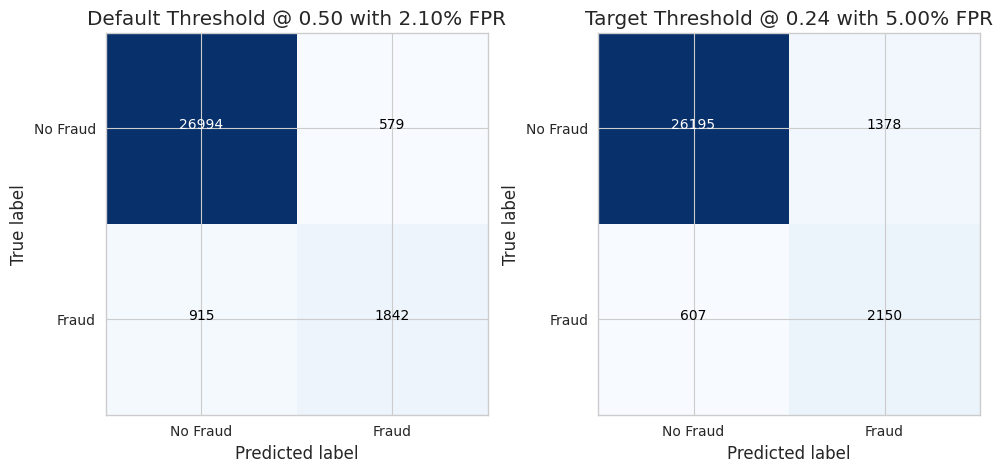

In [ ]:
# Testing final XGBoost model using the test data and calculating metrics
xgb_final_fpr, xgb_final_tpr, xgb_final_default_recall, xgb_final_target_recall = test_classifier(xgb_final, X_test, y_test)

In [ ]:
# Ensure the models directory exists
os.makedirs("./models", exist_ok=True)

In [ ]:
# Save the model
with open("./models/xgb_final.pkl", "wb") as f:
    pickle.dump(xgb_final, f)

# Save
xgb_final.save_model("./models/xgb_final.json")

NameError: name 'pickle' is not defined

### 7.2 Storing Test Data in SQLite3 Database

To simplify the generation of random test data in the user interface, I have implemented a solution where the test data is saved to a SQLite3 database table. This enables the generation of random test rows with just a click of a button, allowing for quick and convenient testing of the web application.

In [ ]:
# Importing the sqlite3 library to save testing dataframe
import sqlite3

In [ ]:
# Connect to the database
conn = sqlite3.connect('bank-account-fraud.db')

# Save the dataframe to the database
X_test.to_sql('X_test', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [ ]:
new_user_data = {
    'income': [0.5],
    'name_email_similarity': [0.8],
    'prev_address_months_count': [-1], # Example of a missing value
    'current_address_months_count': [36],
    'customer_age': [30],
    'days_since_request': [5],
    'intended_balcon_amount': [150.0],
    'payment_type':['AB'],
    'zip_count_4w': [1500],
    'velocity_6h': [500],
    'velocity_24h': [2000],
    'velocity_4w': [4000],
    'bank_branch_count_8w': [250],
    'date_of_birth_distinct_emails_4w': [2],
    'employment_status': ['CA'],
    'credit_risk_score': [150],
    'email_is_free': [0],
    'housing_status':['BC'],
    'phone_home_valid': [1],
    'phone_mobile_valid': [1],
    'bank_months_count': [24],
    'has_other_cards': [0],
    'proposed_credit_limit': [1000],
    'foreign_request': [0],
    'source':['INTERNET'],
    'session_length_in_minutes': [35],
    'device_os':['linux	'],
    'keep_alive_session': [1],
    'device_distinct_emails_8w': [1],
    'device_fraud_count': [0],
    'month': [3]
}


In [ ]:
# Convert the dictionary to a DataFrame
# If your model was trained on a specific set of features, ensure new data has the same
# columns and is in the same order.
new_data_df = pd.DataFrame(new_user_data)

In [ ]:
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_data_df.columns if new_data_df[x].dtypes == "O"]
print(categorical_features)

numeric_features = [col for col in new_data_df.columns if col not in categorical_features]
print(numeric_features)


In [ ]:
from joblib import load
preprocessor = load('./preprocessor/preprocessor.joblib')


# Now, transform the new input data
X_new_scaled = preprocessor.transform(new_data_df)
feature_names_out = preprocessor.get_feature_names_out()

# Convert the scaled NumPy array to a pandas DataFrame
# This is the crucial step to fix the error.
X_new_scaled = pd.DataFrame(X_new_scaled, columns=feature_names_out)

# Remove 'remainder__' from the feature names
X_new_scaled.columns = [col.replace('remainder__', '') for col in X_new_scaled.columns]

# Remove '__' from the feature names
X_new_scaled.columns = [col.replace(' __', '') for col in X_new_scaled.columns]
# Note: I've changed your original string replace from ' __' to '__'
# as the previous part of the code removes the space. This is a common
# formatting issue to watch out for.

print(X_new_scaled.columns)
X_new_scaled.shape

In [ ]:
# Normalize column names to match training
X_new_scaled.columns = [
    col.replace("scaled__", "")
       .replace("categorical__", "")
       .replace("remainder__", "")
    for col in X_new_scaled.columns
]

# 4. Drop the constant feature
X_new_scaled.drop(['device_fraud_count'], axis=1, inplace=True)

In [ ]:
# Load your model
model = XGBClassifier()
model.load_model("./models/xgb_final.json")

# Get feature names the model was trained with
trained_features = model.get_booster().feature_names

# Reorder your DataFrame to match training features
X_new_scaled = X_new_scaled[trained_features]

# Now predict
probabilities = model.predict_proba(X_new_scaled)

In [ ]:
print("Preprocessed data shape:", X_new_scaled.shape)
print("Prediction probabilities:", probabilities)

In [ ]:
fraud_probability = probabilities[0][1]

# Make a decision based on a threshold (e.g., 0.5)
if fraud_probability > 0.5:
    prediction = "FRAUDULENT"
else:
    prediction = "NOT FRAUDULENT"

In [ ]:
print(f"\nPrediction for new user data: {prediction}")
print(f"Probability of being fraudulent: {fraud_probability:.4f}")
print(f"Probability of not being fraudulent: {probabilities[0][0]:.4f}")